#  성별에 따른 데이터 시각화 및 나이브 베이즈이론을 활용한 예약 이행 여부 예측
## 캐글  문제 : https://www.kaggle.com/joniarroba/noshowappointments
### 데이터

https://raw.githubusercontent.com/ZubairHussain/Appointment-No-Show-/master/No-show-Issue-Comma-300k.csv

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
!curl https://raw.githubusercontent.com/ZubairHussain/Appointment-No-Show-/master/No-show-Issue-Comma-300k.csv \
    -o no_show.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.6M  100 23.6M    0     0  39.0M      0 --:--:-- --:--:-- --:--:-- 38.9M


In [78]:
data =  pd.read_csv("no_show.csv")
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


# 1. 데이터 점검

### 1.1 데이터 정리 및 오타 제거

일부 column의 오타를 알맞게 고치고 예약 등록날과 예약된 날의 간격의 수를 양수로 바꾸어준다.  

In [79]:
data.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

In [151]:
data.rename(columns = {'ApointmentData':'AppointmentData', 'Alcoolism': 'Alcoholism', #철자가 틀린것을 고치기
                         'HiperTension': 'Hypertension', 'Handcap': 'Handicap'}, inplace = True)

data.head(5)

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Wait_period,Time
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29,Month,14
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1,Immediate,7
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1,Immediate,12
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,15,Month,17
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6,Week,15


In [81]:
data.AwaitingTime = data.AwaitingTime.apply(abs) # 등록날과 예약된 날의 간격이 음수로 되어있는데 이것을 절대값을 씌어주어 양수로 고쳐준다
print(data.AwaitingTime.head())

0    29
1     1
2     1
3    15
4     6
Name: AwaitingTime, dtype: int64


###  1.2  에러 체크 및 제거
데이터를 확인하여 NAN이나 맞지 않는 값을 찾아내 제거한다.

In [152]:
pd.Series([2,1,3,3]).unique()

array([2, 1, 3])

In [83]:
print('Age:',sorted(data.Age.unique())) # 각 데이터들의 잘못된 값이나 NAN값을 확인한다 SORTED는 값을 정렬해주고
print('Gender:',data.Gender.unique())   # unique는 중복없이 값을 보여준다
print('DayOfTheWeek:',data.DayOfTheWeek.unique())
print('Status:',data.Status.unique())
print('Diabetes:',data.Diabetes.unique())
print('Alcoholism:',data.Alcoholism.unique())
print('Hypertension:',data.Hypertension.unique())
print('Handicap:',data.Handicap.unique())
print('Smokes:',data.Smokes.unique())
print('Scholarship:',data.Scholarship.unique())
print('Tuberculosis:',data.Tuberculosis.unique())
print('Sms_Reminder:',data.Sms_Reminder.unique())
print('AwaitingTime:',sorted(data.AwaitingTime.unique()))

Age: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 108, 113]
Gender: ['M' 'F']
DayOfTheWeek: ['Wednesday' 'Tuesday' 'Thursday' 'Friday' 'Monday' 'Saturday' 'Sunday']
Status: ['Show-Up' 'No-Show']
Diabetes: [0 1]
Alcoholism: [0 1]
Hypertension: [0 1]
Handicap: [0 1 2 3 4]
Smokes: [0 1]
Scholarship: [0 1]
Tuberculosis: [0 1]
Sms_Reminder: [0 1 2]
AwaitingTime: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6

-1과 -2같이 잘못된 나이와 데이터 정리를 위해 100세 이상의 나이를 모두 제거 한다

In [153]:
data = data[(data.Age >= 0) & (data.Age <= 100)]

###  1.3  전체 객체에서 남자 여자 비율  및 예약 이행 비율 확인

In [85]:
pd.crosstab(index = data['Gender'], columns = data['Status'])   # cross tabulation (그룹화할 행과 열 지정)

Status,No-Show,Show-Up
Gender,,
F,59879,140593
M,30840,68655


In [154]:
pd.crosstab(index = data['Gender'], columns = data.Status)

Status,No-Show,Show-Up
Gender,,
F,59879,140593
M,30840,68655


In [155]:
pd.crosstab(index = data['Gender'], columns = data.Status).reset_index() # index->1st column

Status,Gender,No-Show,Show-Up
0,F,59879,140593
1,M,30840,68655


In [160]:
df = pd.crosstab(index = data['Gender'], columns = data.Status).reset_index()    # cross tabulation
# df['Sum']= pd.DataFrame([((data['Gender']== 'F').sum()), ((data['Gender']== 'M').sum())])
df['Sum']= [((data['Gender']== 'F').sum()), ((data['Gender']== 'M').sum())]
df

Status,Gender,No-Show,Show-Up,Sum
0,F,59879,140593,200472
1,M,30840,68655,99495


In [161]:
all_oj = (data['Gender']== 'M').sum() + (data['Gender']== 'F').sum()         # 전체 객체수
print("Man : ", round((data['Gender']== 'M').sum() /all_oj , 4)*100 , '%')
print("Woman : ", round((data['Gender']== 'F').sum() /all_oj , 4)*100 , '%')

Man :  33.17 %
Woman :  66.83 %


In [162]:
FM = data[(data['Gender']== 'F')]    # 여자만 있는 데이터프레임 생성
f_oj = (data['Gender']== 'F').sum()  # 여자 객체수

# FM.head()

print("WoMan No-Show : ", round((FM['Status']== 'No-Show').sum() /f_oj , 5)*100 , '%')  # 여자가 예약 이행 안한 비율
print("WoMan Show-up : ", 100-round((FM['Status']== 'No-Show').sum() /f_oj , 5)*100 , '%')  # 여자가 예약 이행 한 비율
# print("WoMan Show-up : ", round((FM['Status']== 'Show-Up').sum() /f_oj , 5)*100 , '%')

WoMan No-Show :  29.869 %
WoMan Show-up :  70.131 %


In [163]:
MM = data[(data['Gender']== 'M')]    # 남자만 있는 데이터프레임 생성
m_oj = (data['Gender']== 'M').sum()  # 남자 객체수
print("Man No-Show : ", round((MM['Status']== 'No-Show').sum() /m_oj , 5)*100 , '%')  # 남자가 예약 이행 안한 비율
print("Man Show-up : ", 100-round((MM['Status']== 'No-Show').sum() /m_oj , 5)*100 , '%') # 남자가 예약 이행 한 비율

Man No-Show :  30.997000000000003 %
Man Show-up :  69.003 %


# 2. 데이터 탐구

### 2.1 여러가지 데이터를 이용하여 남자와 여자 예약 이행 여부 시각화

#### 나이에 따른 예약 이행 여부 시각화

In [91]:
df = data[data.Status == 'Show-Up']   # 예약 이행한 것만 추출후 df에 저장
df2 = pd.DataFrame()
df2['Men'] = range(100)
df2['Women'] = range(100)

In [92]:
df.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6


In [93]:
df2.head()

,Men,Women
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [169]:
df2.Men[0], df2.Men.iloc[0]

(3725, 3725)

In [94]:
for x in range(100):
    df2.Men[x] = len(df[(df.Age == x) & (df.Gender == 'M')])
    df2.Women[x] = len(df[(df.Age == x) & (df.Gender == 'F')])

In [95]:
df2.head()

,Men,Women
0,3725,3651
1,1453,1399
2,905,856
3,1047,884
4,1198,1060


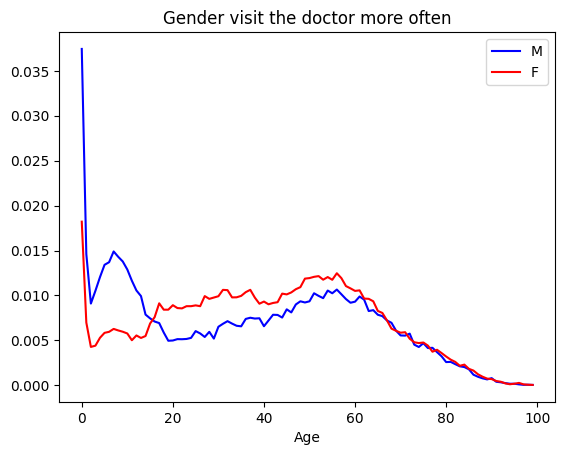

In [96]:
plt.xlabel('Age')
plt.title('Gender visit the doctor more often')                 # 그래프의 이름 설정
plt.plot(range(100), df2.Men/(data['Gender']== 'M').sum(), 'b') # 남자의 연령별 예약 이행 비율
plt.plot(range(100), df2.Women/(data['Gender']== 'F').sum(), color = 'r') # 여자의 연령별 예약 이행 비율
plt.legend(['M','F'])
plt.show()

### the other way

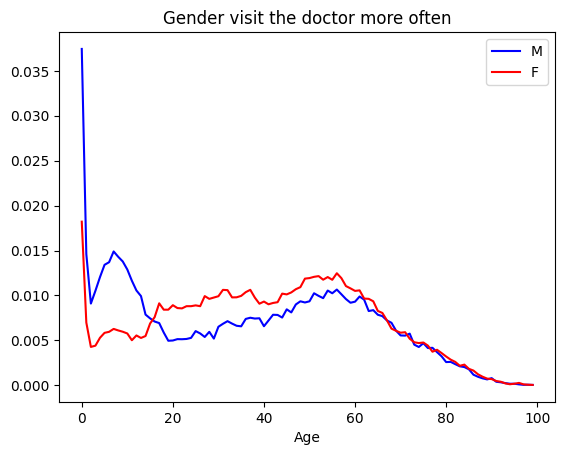

In [97]:
df = data[data.Status == 'Show-Up'] ## 예약 이행한 것만 추출후 df에 저장
range_df = pd.DataFrame()
range_df['Age'] = range(100)

men = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'M')]))
women = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'F')]))

plt.xlabel('Age')
plt.title('Gender visit the doctor more often')            #그래프의 이름 설정
plt.plot(range(100), men/(data['Gender']== 'M').sum(), 'b') #남자의 연령별 예약 이행 비율
plt.plot(range(100), women/(data['Gender']== 'F').sum(), color = 'r') #여자의 연령별 예약 이행 비율
plt.legend(['M','F'])
plt.show()

In [98]:
df2.Men.values, men.values

(array([3725, 1453,  905, 1047, 1198, 1334, 1363, 1482, 1423, 1371, 1282,
        1158, 1050,  988,  783,  741,  706,  689,  584,  493,  496,  511,
         510,  513,  525,  600,  574,  535,  592,  517,  648,  681,  710,
         683,  659,  653,  735,  748,  739,  742,  654,  717,  781,  779,
         750,  841,  807,  895,  930,  917,  930, 1019,  990,  965, 1049,
        1019, 1060, 1008,  955,  914,  926,  983,  948,  822,  832,  781,
         766,  718,  692,  605,  552,  550,  572,  450,  424,  466,  412,
         415,  367,  321,  257,  259,  234,  210,  202,  177,  117,   94,
          77,   65,   79,   39,   33,   24,   17,   17,   10,    5,    6,
           4]),
 array([3725, 1453,  905, 1047, 1198, 1334, 1363, 1482, 1423, 1371, 1282,
        1158, 1050,  988,  783,  741,  706,  689,  584,  493,  496,  511,
         510,  513,  525,  600,  574,  535,  592,  517,  648,  681,  710,
         683,  659,  653,  735,  748,  739,  742,  654,  717,  781,  779,
         750,  841,  8

In [172]:
men/(data['Gender']== 'M').sum()

0     0.037439
1     0.014604
2     0.009096
3     0.010523
4     0.012041
        ...   
95    0.000171
96    0.000101
97    0.000050
98    0.000060
99    0.000040
Name: Age, Length: 100, dtype: float64

In [99]:
type(df2.Men), type(men)

(pandas.core.series.Series, pandas.core.series.Series)

#### 각종 질병 발생 시에 남녀 예약 이행 비율

In [100]:
men_smoke = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'M') & (df.Smokes == 1)])) #남자이며 흡연자
women_smoke = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'F') & (df.Smokes == 1)])) #여자이며 흡연자

men_tension = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'M') & (df.Hypertension == 1)])) #남자이며 고혈압
women_tension = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'F') & (df.Hypertension == 1)])) #여자이며 고혈압

men_Diabetes = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'M') & (df.Diabetes == 1)])) #남자이며 당뇨병
women_Diabetes = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'F') & (df.Diabetes == 1)])) #여자이며 당뇨병

men_Tuber = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'M') & (df.Tuberculosis == 1)])) #남자이며 결핵
women_Tuber = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'F') & (df.Tuberculosis == 1)]))#여자이며 결핵

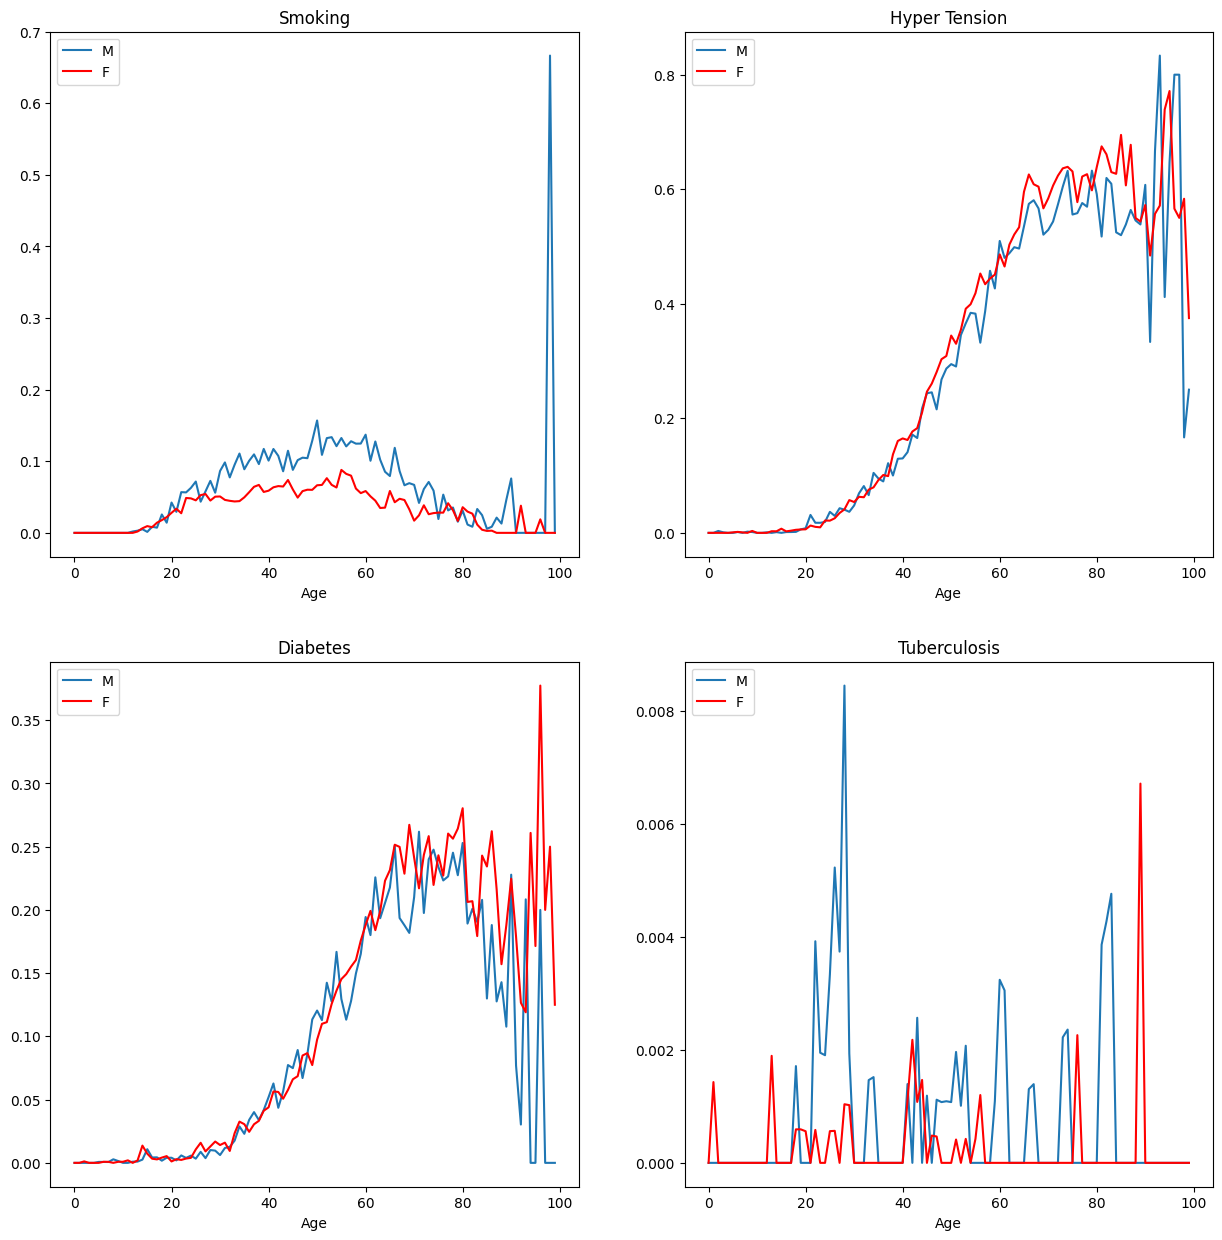

In [101]:
plt.figure(figsize = (15,15))        ## 그래프 사이즈
plt.subplot(221)                     ## 행 열 그리고 그 행열에 위치
plt.plot(range(100),men_smoke/men)   # 세로축을 비율로 만들기위해 (나이별로) 전체 남자에서 남자흡연자를 나눈다.
plt.plot(range(100),women_smoke/women, color = 'r')
plt.title('Smoking') #제목
plt.legend(['M','F'], loc = 2)
plt.xlabel('Age')

plt.subplot(222)
plt.plot(range(100),men_tension/men)
plt.plot(range(100),women_tension/women, color = 'r')
plt.title('Hyper Tension')
plt.legend(['M','F'], loc = 2)
plt.xlabel('Age')

plt.subplot(223)
plt.plot(range(100),men_Diabetes/men)
plt.plot(range(100),women_Diabetes/women, color = 'r')
plt.title('Diabetes')
plt.legend(['M','F'], loc = 2)
plt.xlabel('Age')

plt.subplot(224)
plt.plot(range(100),men_Tuber/men)
plt.plot(range(100),women_Tuber/women, color = 'r')
plt.legend(['M','F'], loc = 2)
plt.xlabel('Age')

plt.title('Tuberculosis')
plt.show()

In [102]:
men_smoke.head(), men.head()

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: Age, dtype: int64,
 0    3725
 1    1453
 2     905
 3    1047
 4    1198
 Name: Age, dtype: int64)

대부분의 질병은 남녀 비율이 비슷하지만  결핵에 한해서는 남자의 비율이 높다

#### 예약 등록날과 예약 당일날과의 차이(간격)

In [103]:
bins = [0, 2, 7, 14, 30, 90, 180, 9999] # 예약 시간과의 공백이 막연히 숫자로 만 되어있어서 문자로 만들어주기위한 기준배열
labels = ["Immediate", "Week" ,"Two Weeks", "Month", "Trimester" , "Half year" , "Forever"]

In [104]:
# cut는 한 column에서 리스트를 사용하여 기준을 나눈다.
wait_period = pd.cut(data.AwaitingTime, bins, labels=labels)

In [173]:
wait_period.head()

0        Month
1    Immediate
2    Immediate
3        Month
4         Week
Name: AwaitingTime, dtype: category
Categories (7, object): ['Immediate' < 'Week' < 'Two Weeks' < 'Month' < 'Trimester' < 'Half year' <
                         'Forever']

In [174]:
data['Wait_period'] = wait_period # 새로운 column을 만들어 이것을 넣고 예약 이행자들만 추출한다
df = data[data.Status == 'Show-Up']
wait_df =  pd.DataFrame(labels)

In [175]:
wait_df

,0
0,Immediate
1,Week
2,Two Weeks
3,Month
4,Trimester
5,Half year
6,Forever


In [108]:
men_wait = wait_df[wait_df.columns[0]].apply(lambda x: len(df[(df.Wait_period == x) & (df.Gender == 'M')]))
women_wait = wait_df[wait_df.columns[0]].apply(lambda x: len(df[(df.Wait_period == x) & (df.Gender == 'F')]))

In [109]:
men_wait, women_wait

(0    15041
 1    20677
 2    11691
 3    14683
 4     6237
 5      290
 6       36
 Name: 0, dtype: int64,
 0    29523
 1    41556
 2    24001
 3    31067
 4    13625
 5      763
 6       58
 Name: 0, dtype: int64)

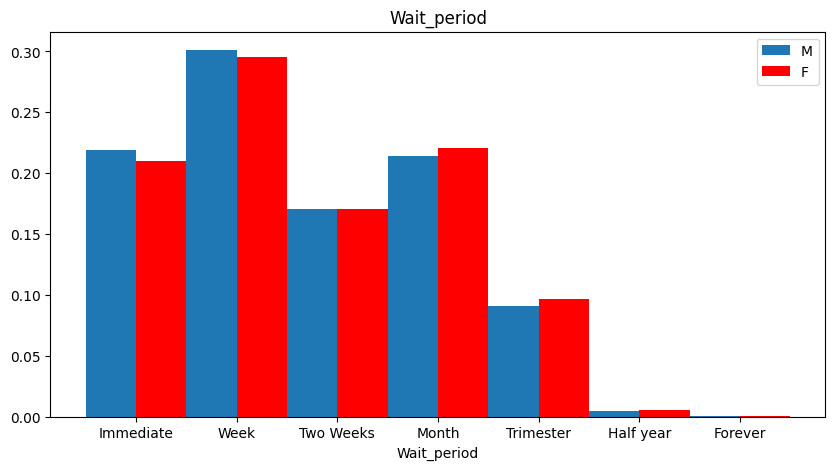

In [110]:
plt.figure(figsize = (10,5)) # 그래프 사이즈
plt.bar(range(7), men_wait/len(df[df.Gender == 'M']), width = 0.5)  #막대를 7개만들고 막대 크기를 0.5로한다
plt.bar(range(7)+0.5*np.ones(len(range(7))), women_wait/len(df[df.Gender == 'F']), width = 0.5, color = 'r')
plt.xticks(range(7) + 0.25*np.ones(len(range(7))), labels)  # x축의 라벨 삽입

plt.title('Wait_period')
plt.xlabel('Wait_period')
plt.legend(['M','F'])
plt.show()

#### 어떤 요일을 가장 많이 선호하는가에 대한 시각화

In [111]:
Days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']  # 요일을 리스트로 만든다
Days_df = pd.DataFrame(Days)  #그것을 데이터 프레임으로 만든다

In [112]:
Days_df

,0
0,Monday
1,Tuesday
2,Wednesday
3,Thursday
4,Friday
5,Saturday
6,Sunday


In [113]:
men_days = Days_df[Days_df.columns[0]].apply(lambda x: len(df[(df.DayOfTheWeek == x) & (df.Gender == 'M')]))
women_days = Days_df[Days_df.columns[0]].apply(lambda x: len(df[(df.DayOfTheWeek == x) & (df.Gender == 'F')]))

In [114]:
men_days

0    13324
1    14201
2    14832
3    14158
4    11914
5      226
6        0
Name: 0, dtype: int64

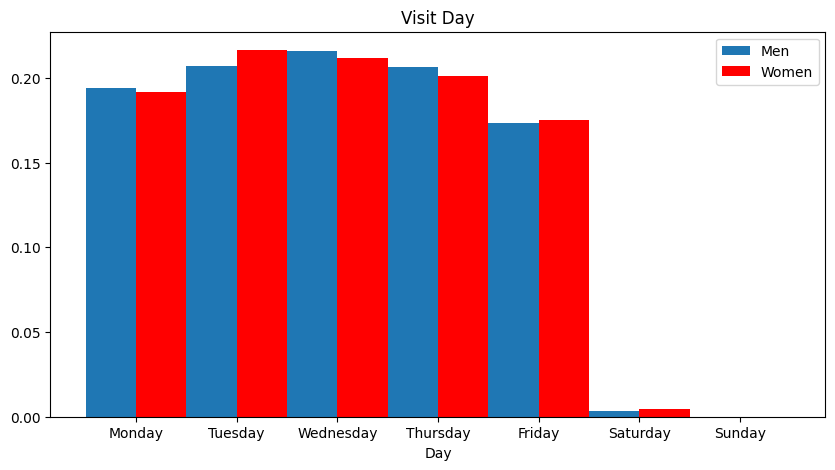

In [115]:
plt.figure(figsize = (10,5))
plt.bar(range(7), men_days/len(df[df.Gender == 'M']), width = 0.5)
plt.bar(range(7)+0.5*np.ones(len(range(7))), women_days/len(df[df.Gender == 'F']), width = 0.5, color = 'r')
plt.xticks(range(7) + 0.25*np.ones(len(range(7))),Days)

plt.title('Visit Day')
plt.xlabel('Day')
plt.legend(['Men','Women'])
plt.show()

예약 공백기간에서 남자들은 최근 예약을 잘 이행하는 반면에 여자들은 오래 된 예약을 더 잘 지키는 경향이 있다
요일 같은 경우에는 주말에 멀수록 예약자들이 많았고 남녀 비율은 요일마다 들쭉날쭉하므로 큰 영향이 없어보였다.

#### 월 별 예약 이행자에 대한 시각화

In [116]:
dts = data.copy() #데이터복사를 한 이유는 원본 데이터가 들어있는 변수에 영향을 주지 않기위함이다
dts.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Wait_period
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29,Month
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1,Immediate
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1,Immediate
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,15,Month
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6,Week


In [117]:
# dts.AppointmentData.head() , dts['AppointmentData'].head()

In [118]:
dts['AppointmentData'][0][:15]

'2015-01-14T00:0'

In [119]:
dts['Month'] = dts['AppointmentData'].apply(lambda x: x[5:7]) # 5:7은  날짜에서 월만 추출한다는것이다
dts = dts[dts.Status == 'Show-Up']
dts= dts[["Month","Gender"]]

In [120]:
dts.head()

,Month,Gender
0,01,M
1,08,F
2,02,F
3,08,M
4,10,M


In [121]:
dts = pd.crosstab(index = dts['Month'], columns = dts.Gender) #월을 인덱스에 컬럼에 성별을 넣는 새로운 데이터프레임 생성

In [122]:
dts

Gender,F,M
Month,,
01,11063,5325
02,10820,5105
03,11725,5649
04,11120,5309
05,12353,6012
06,11881,5858
07,12541,6256
08,12345,6114
09,12153,6167


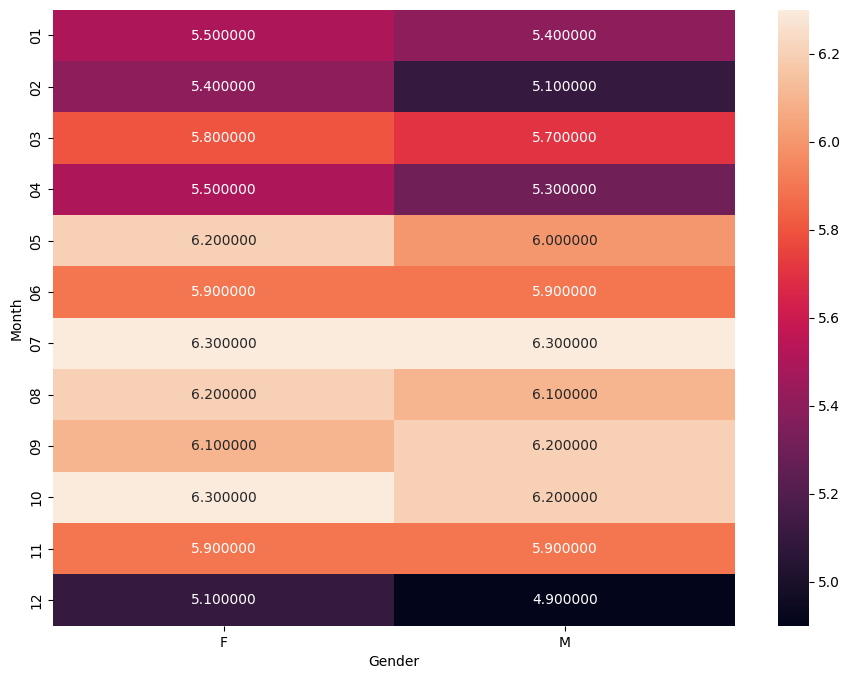

In [123]:
dts['F'] = round((dts['F']/f_oj),3) *100
dts['M'] = round((dts['M']/m_oj),3) *100
plt.figure(figsize=(11,8))
sns.heatmap(dts, annot=True, fmt='f') ##annot는 각 셀에 값을 표시할지 여부 fmt는 표현 방식 f는 실수형
plt.show()

병원 이용객은 여름 가을에 가장 많았으며 특히 휴가철인 7월에 절정을 찍었다. 하지만 남녀의 차이에는 큰 영향이 없었다.

#### 하루 중에 어떤 시간에 가장 많이 예약을 등록하러 오는지에 대한 시각화

In [124]:
data.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Wait_period
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29,Month
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1,Immediate
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1,Immediate
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,15,Month
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6,Week


<ipython-input-177-0724b6066246>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Time[data.Gender == 'M'], bins = range(24),norm_hist = True)   # histogram shows a density (not a count)
<ipython-input-177-0724b6066246>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Time[data.Gender 

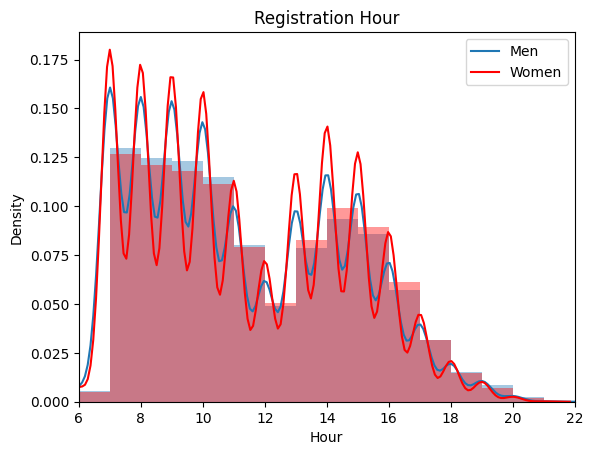

In [177]:
data['Time'] = data['AppointmentRegistration'].apply(lambda x: int(x[11:13])) ##커널밀도 추정 히스토그램을 스무디하게 평활화
                                                                              ##  (distribution plot)
# sns.distplot(data.Time[data.Gender == 'M'], bins = range(24),norm_hist = True, kde = False)   # histogram shows a density (not a count)
# sns.distplot(data.Time[data.Gender == 'F'], bins = range(24),norm_hist = True, kde = False, color = 'r')
                                                    ##norm_hist y의 값을 퍼센트값

sns.distplot(data.Time[data.Gender == 'M'], bins = range(24),norm_hist = True)   # histogram shows a density (not a count)
sns.distplot(data.Time[data.Gender == 'F'], bins = range(24),norm_hist = True, color = 'r')
plt.xlim([6,22]) # x축 범위 설정 병원이 6시부터 22시까지 운영하기 때문이다
plt.title('Registration Hour')
plt.xlabel('Hour')
plt.legend(['Men','Women'])
plt.show()

남자들은 주로 아침에 많이 예약을 등록하고 여자는 낮에 많이 예약을 등록한다

### 2.2 두 가지 질병을 가진 사람의 예약 이행 여부 비교

지금까지는 한 가지의 조건만으로 비교했는데 이번엔 알코올 의존증과 폐암을 동시에 비교한다

In [126]:
data2 = data.copy()
data2.eval("Show = Status == 'Show-Up'", inplace=True) # inplace는 새 dataframe을 반환할지 기존 것을 변경할지말이다
                                                        # 기본적으로 false로 설정된다
data2.eval("No = Status == 'No-Show'", inplace=True)   # eval은 파이썬 표현식만 포함 가능하다

In [127]:
data.head(3)

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Wait_period,Time
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29,Month,14
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1,Immediate,7
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1,Immediate,12


In [128]:
data2.head(3)

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Wait_period,Time,Show,No
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29,Month,14,True,False
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1,Immediate,7,True,False
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1,Immediate,12,True,False


In [129]:
# groupby 연습
df = pd.DataFrame({'Animal' : ['Falcon', 'Falcon', 'Parrot', 'Parrot'],
                   'Max Speed' : [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [130]:
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [131]:
groups = data2[['Gender', 'Smokes', 'Alcoholism', "Show", "No"]].groupby(['Gender', 'Smokes', 'Alcoholism'])
gps = pd.DataFrame(groups.mean())

In [132]:
gps

Show        No
Gender Smokes Alcoholism                    
F      0      0           0.704274  0.295726
              1           0.649186  0.350814
       1      0           0.664078  0.335922
              1           0.576141  0.423859
M      0      0           0.693024  0.306976
              1           0.663296  0.336704
       1      0           0.681319  0.318681
              1           0.618462  0.381538

In [133]:
groups.sum()

Show     No
Gender Smokes Alcoholism               
F      0      0           133867  56211
              1              718    388
       1      0             4960   2509
              1             1048    771
M      0      0            63131  27964
              1             1312    666
       1      0             2604   1218
              1             1608    992

In [134]:
gps["No-count"] = groups.sum()["No"]    # 예약 불 이행자의 객체수를 더한다
gps["Sh-count"] = groups.sum()["Show"]  # 예약 이행자의 객체수를 더한다
gps

Show        No  No-count  Sh-count
Gender Smokes Alcoholism                                        
F      0      0           0.704274  0.295726     56211    133867
              1           0.649186  0.350814       388       718
       1      0           0.664078  0.335922      2509      4960
              1           0.576141  0.423859       771      1048
M      0      0           0.693024  0.306976     27964     63131
              1           0.663296  0.336704       666      1312
       1      0           0.681319  0.318681      1218      2604
              1           0.618462  0.381538       992      1608

In [135]:
### exercise for groupby
df = pd.DataFrame({'A': [1, 1, 2, 1, 2],
                   'B': [np.nan, 2, 3, 4, 5],
                   'C': [1, 2, 1, 1, 2]}, columns=['A', 'B', 'C'])
df

,A,B,C
0,1,NaN,1
1,1,2.0,2
2,2,3.0,1
3,1,4.0,1
4,2,5.0,2


In [136]:
df.groupby('A').mean()

,B,C
A,,
1,3.0,1.333333
2,4.0,1.500000


In [137]:
df.groupby('A').sum()

,B,C
A,,
1,6.0,4
2,8.0,3


In [138]:
df.groupby(['A', 'B']).mean()

C
A B       
1 2.0  2.0
  4.0  1.0
2 3.0  1.0
  5.0  2.0

In [139]:
df.groupby('A').mean()

,B,C
A,,
1,3.0,1.333333
2,4.0,1.500000


In [140]:
df.groupby('A').mean()['B']

A
1    3.0
2    4.0
Name: B, dtype: float64

In [141]:
df.groupby('A')['B'].mean()

A
1    3.0
2    4.0
Name: B, dtype: float64

신기하게도 두 가지 병을 앓고 있는 사람들의 예약 이행 비율이 건강한사람들보다 더 작았고 이것은 남녀 모두에게 나타났다.

#### 밀접한 관계의 합병증

당뇨병을 앓고 있는 사람들은 고혈압을, 고혈압을 가지고 있는 사람들은 당뇨병을 가지고 있는 경우가 많은데 그 만큼 두 가지의 병의 관계는 깊다. 그래서 이번엔 밀접한 관계에 있는 두 가지의 병을 묶어서 수치를 계산해 보았다.

In [142]:
groups = data2[['Gender','Hypertension','Diabetes', "Show", "No"]].groupby(['Gender','Hypertension','Diabetes'])
gps = pd.DataFrame(groups.mean())
gps["No-count"] = groups.sum()["No"]
gps["Sh-count"] = groups.sum()["Show"]
gps

Show        No  No-count  Sh-count
Gender Hypertension Diabetes                                        
F      0            0         0.686039  0.313961     47631    104079
                    1         0.735242  0.264758       740      2055
       1            0         0.749374  0.250626      8113     24258
                    1         0.750294  0.249706      3395     10201
M      0            0         0.675870  0.324130     25675     53537
                    1         0.707723  0.292277       439      1063
       1            0         0.745917  0.254083      3376      9911
                    1         0.754277  0.245723      1350      4144

밀접한 관계에 있는 당뇨와 고혈압의 경우에는 위와는 정반대로 약속 이행 비율이 더 높게 나타났다 이것 또한 남녀 모두에게 나타났다

# 3. 예약 불이행 예측

코드 출처 https://www.kaggle.com/somrikbanerjee/d/joniarroba/noshowappointments/predicting-show-up-no-show

먼저 반의 데이터로 기계학습을 한 뒤에 이것을 기반으로 나머지 반의 데이터의 예약 이행 여부 확률을 구한다

남자의 경우는 홀수개의 데이터이기 때문에 하나를 제외한다

In [143]:
FM.describe(), MM.describe()

(                 Age       Diabetes     Alcoholism   Hypertension  \
 count  200472.000000  200472.000000  200472.000000  200472.000000   
 mean       39.471647       0.081762       0.014591       0.229294   
 std        21.738136       0.274003       0.119907       0.420380   
 min         0.000000       0.000000       0.000000       0.000000   
 25%        22.000000       0.000000       0.000000       0.000000   
 50%        39.000000       0.000000       0.000000       0.000000   
 75%        56.000000       0.000000       0.000000       0.000000   
 max       100.000000       1.000000       1.000000       1.000000   
 
             Handicap         Smokes    Scholarship   Tuberculosis  \
 count  200472.000000  200472.000000  200472.000000  200472.000000   
 mean        0.016890       0.046331       0.120446       0.000314   
 std         0.140206       0.210201       0.325483       0.017725   
 min         0.000000       0.000000       0.000000       0.000000   
 25%         0.000

In [144]:
FM.info(), MM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200472 entries, 1 to 299997
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      200472 non-null  int64 
 1   Gender                   200472 non-null  object
 2   AppointmentRegistration  200472 non-null  object
 3   AppointmentData          200472 non-null  object
 4   DayOfTheWeek             200472 non-null  object
 5   Status                   200472 non-null  object
 6   Diabetes                 200472 non-null  int64 
 7   Alcoholism               200472 non-null  int64 
 8   Hypertension             200472 non-null  int64 
 9   Handicap                 200472 non-null  int64 
 10  Smokes                   200472 non-null  int64 
 11  Scholarship              200472 non-null  int64 
 12  Tuberculosis             200472 non-null  int64 
 13  Sms_Reminder             200472 non-null  int64 
 14  AwaitingTime        

(None, None)

In [145]:
FM.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1
5,5,F,2014-06-17T06:47:27Z,2014-07-22T00:00:00Z,Tuesday,No-Show,0,0,0,0,0,0,0,1,35
6,46,F,2015-06-19T19:53:58Z,2015-07-07T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,18
7,4,F,2015-08-07T08:19:19Z,2015-08-21T00:00:00Z,Friday,Show-Up,0,0,0,0,0,1,0,1,14


In [146]:
MM.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6
10,33,M,2015-10-01T08:43:18Z,2015-11-09T00:00:00Z,Monday,Show-Up,0,0,0,0,0,0,0,0,39
14,38,M,2014-03-21T08:23:16Z,2014-03-27T00:00:00Z,Thursday,No-Show,0,0,0,0,0,0,0,1,6


In [147]:
FM_train = FM[['Age', 'Diabetes','Hypertension', 'Tuberculosis', 'Smokes',   # 나이, 질병, 고혈압, 당뇨병, 흡연등의 컬럼을 가져와
                         'Alcoholism', 'Scholarship']].iloc[:100236]         #학습을 시킨다
F_train = FM.Status[:100236]

FM_test = FM[['Age', 'Diabetes','Hypertension', 'Tuberculosis', 'Smokes',
                         'Alcoholism', 'Scholarship']].iloc[100236:]
F_test = FM.Status[100236:]

In [148]:
F_test.head()

149916    Show-Up
149917    Show-Up
149918    No-Show
149922    Show-Up
149923    Show-Up
Name: Status, dtype: object

In [149]:
MM_train = MM[['Age', 'Diabetes','Hypertension', 'Tuberculosis', 'Smokes',
                         'Alcoholism', 'Scholarship']].iloc[:49747]
M_train = MM.Status[:49747]
MM_test = FM[['Age', 'Diabetes','Hypertension', 'Tuberculosis', 'Smokes',
                         'Alcoholism', 'Scholarship']].iloc[49747:]

M_test = FM.Status[49747:]

### Naive_bayes


In [150]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB


clf =  MultinomialNB().fit(FM_train, F_train)
print('women Accuracy:', accuracy_score(F_test, clf.predict(FM_test)) * 100, '%')

clf2 =  MultinomialNB().fit(MM_train, M_train)
print('man Accuracy:', accuracy_score(M_test, clf2.predict(MM_test)) * 100, '%')

women Accuracy: 70.02873219202682 %
man Accuracy: 70.14297561784707 %
